# Problem Statement

****In this project i will used a email spam data that contain message and target contain spam and ham value our goal is to build a machine learnign model that can classify the sapm and ham email****

# Load the Libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the Dataset

In [106]:
email=pd.read_csv('C:/Users/Laptop House/Data Science Intern/Intern Projects/Spam_Classifier/Dataset/spam.csv',encoding='latin-1')
email.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Drop un-necessary Col

In [107]:
email.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [108]:
email.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


# Rename the Columns

In [109]:
email.rename(columns={"v1":'target',"v2":'text'},inplace=True)
email.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


# Encode the target column

In [110]:
from sklearn.preprocessing import LabelEncoder

In [114]:
email[email['target']=='spam']['text'].iloc[0]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [115]:
encode=LabelEncoder()
email['target']=encode.fit_transform(email['target'])

In [116]:
email.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


**`Not Spam` => `0` and `Spam` => `1`**

# Data Preprocessing
1. Shape
2. Data-types
3. Null Values
4. Duplicates
5. info

# Shape

In [117]:
email.shape

(5572, 2)

**Dataset can contain `5573` records**

# Dtypes

In [118]:
email.dtypes

target     int32
text      object
dtype: object

# Null Values

In [119]:
email.isnull().sum()

target    0
text      0
dtype: int64

**There are no `null` values**

# Duplicates

In [120]:
email.duplicated().sum()

403

**There are `403 Duplicates` in this dataset**

In [121]:
email[email.duplicated()]

,target,text
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls
...,...,...
5524,1,You are awarded a SiPix Digital Camera! call 0...
5535,0,"I know you are thinkin malaria. But relax, chi..."
5539,0,Just sleeping..and surfing
5553,0,Hahaha..use your brain dear


**These are the `duplicates` values in this dataset so we can drop these duplicates**

In [122]:
email.drop_duplicates(inplace=True)

In [123]:
email.duplicated().sum()

0

# Info

In [124]:
email.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int32 
 1   text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


**Now we can add some more columns so that we can see that how many word, sentence are used in `spam` and `ham` messages**

1. we can add `num_char` => nbr of char used in each text.
2. we can add `num_word` => nbr of words used in each text.
3. we can add `num_sentence` => nbr of sentence used in each text.

In [125]:
email["num_char"]=email['text'].apply(len)

**For `num_sentence` and `nbr_word` we used nltk library**

In [126]:
import nltk

In [127]:
email['num_of_words']=email['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [128]:
email['nbr_sent']=email['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [129]:
email.head()

,target,text,num_char,num_of_words,nbr_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# Copy of Dataset

In [130]:
df=email.copy()
df.head(1)

,target,text,num_char,num_of_words,nbr_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


# Describe
**For `Nor Spam`**

In [131]:
email[email['target']==0].describe()

,target,num_char,num_of_words,nbr_sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


**For `Spam`**

In [132]:
email[email['target']==1].describe()

,target,num_char,num_of_words,nbr_sent
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


1. By seeing the both `spam` and `ham` summary we can see that most nbr of `word`, `char` and `sent` used in `not spam` message.
2. we can see that less nbr of `word`, `char` and `sent` used in `not spam` message.

# Exploratory Data Analysis

## target

In [133]:
email['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [134]:
email['target'].value_counts(normalize=True)*100

target
0    87.366996
1    12.633004
Name: proportion, dtype: float64

In [135]:
col=email['target'].value_counts(normalize=True).index
col

Index([0, 1], dtype='int32', name='target')

In [136]:
val=email['target'].value_counts(normalize=True).values
val

array([0.87366996, 0.12633004])

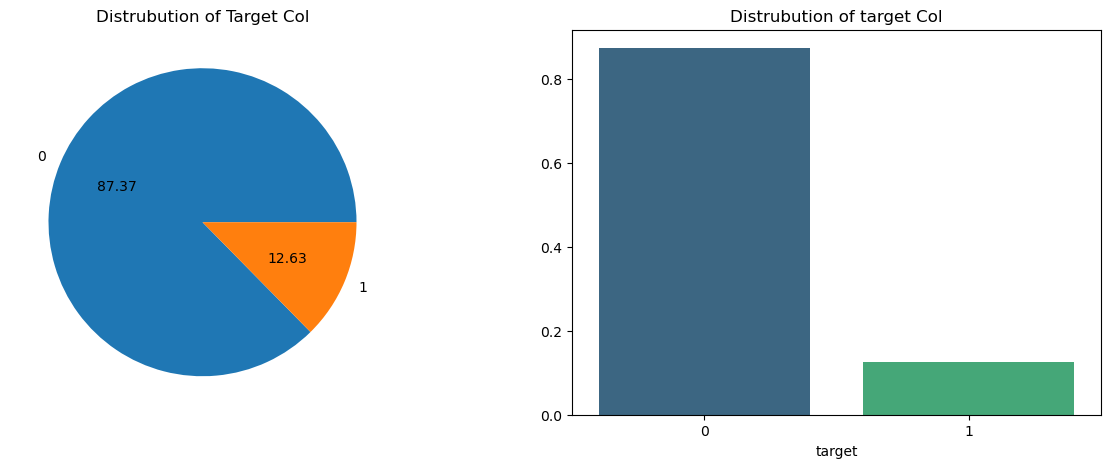

In [137]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.set_title("Distrubution of Target Col")
ax1.pie(val,labels=col,autopct="%.2f")

ax2.set_title("Distrubution of target Col")
sns.barplot(x=col,y=val,palette='viridis')
plt.show()

# Conclussion
1. We can see that data is totally im-balance there is less amount of `Spam` message and large amount of `Not Spam` message

In [138]:
email.head(2)

,target,text,num_char,num_of_words,nbr_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


# Num_char
1. For both `Spam` and `Not Spam`

In [139]:
not_spam=email[email['target']==0]
spam=email[email['target']==1]

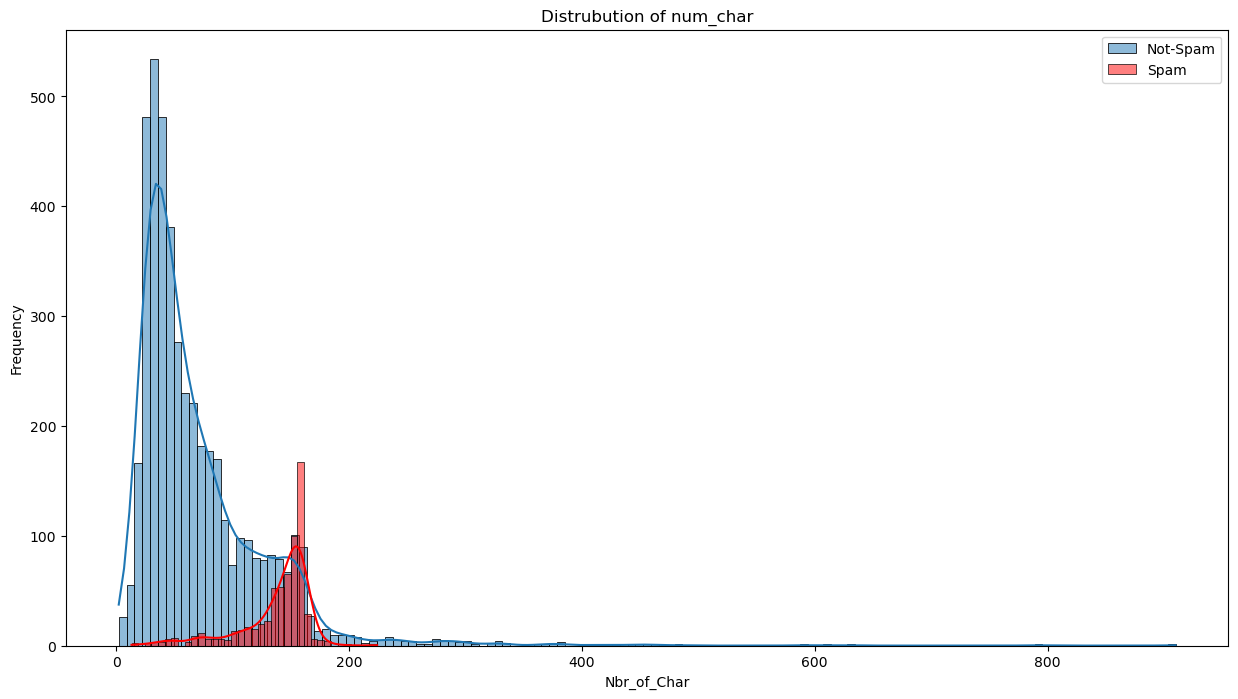

In [140]:
plt.figure(figsize=(15,8))
plt.title("Distrubution of num_char")

sns.histplot(not_spam['num_char'],label='Not-Spam',kde=True)
sns.histplot(spam['num_char'],label='Spam',color='red',kde=True)

plt.xlabel("Nbr_of_Char")
plt.ylabel("Frequency")

plt.legend()
plt.show()

# Conclussion
1. we can see that there is certian outliers so we can remove them

In [141]:
email[email['num_char']>350]

,target,text,num_char,num_of_words,nbr_sent
154,0,"You are everywhere dirt, on the floor, the win...",384,95,5
837,0,"Sir, I have been late in paying rent for the p...",372,89,5
1084,0,For me the love should start with attraction.i...,910,175,1
1512,0,"Hey sweet, I was wondering when you had a mome...",458,102,6
1578,0,How to Make a girl Happy? It's not at all diff...,611,220,38
1862,0,The last thing i ever wanted to do was hurt yo...,790,196,10
2009,0,I can't keep going through this. It was never ...,431,107,5
2011,0,Do whatever you want. You know what the rules ...,375,88,9
2089,0,No i'm not. I can't give you everything you wa...,363,96,6
2133,0,Spoke with uncle john today. He strongly feels...,382,88,7


In [142]:
email[email['num_char']>300].shape

(30, 5)

# Conclussion
1. These are the `30 outlier` so we have frequent nbr of not spam message so we can remove them 

In [143]:
email=email[~(email['num_char']>300)]

In [144]:
email.shape

(5139, 5)

# Check Again

In [145]:
not_spam=email[email['target']==0]
spam=email[email['target']==1]

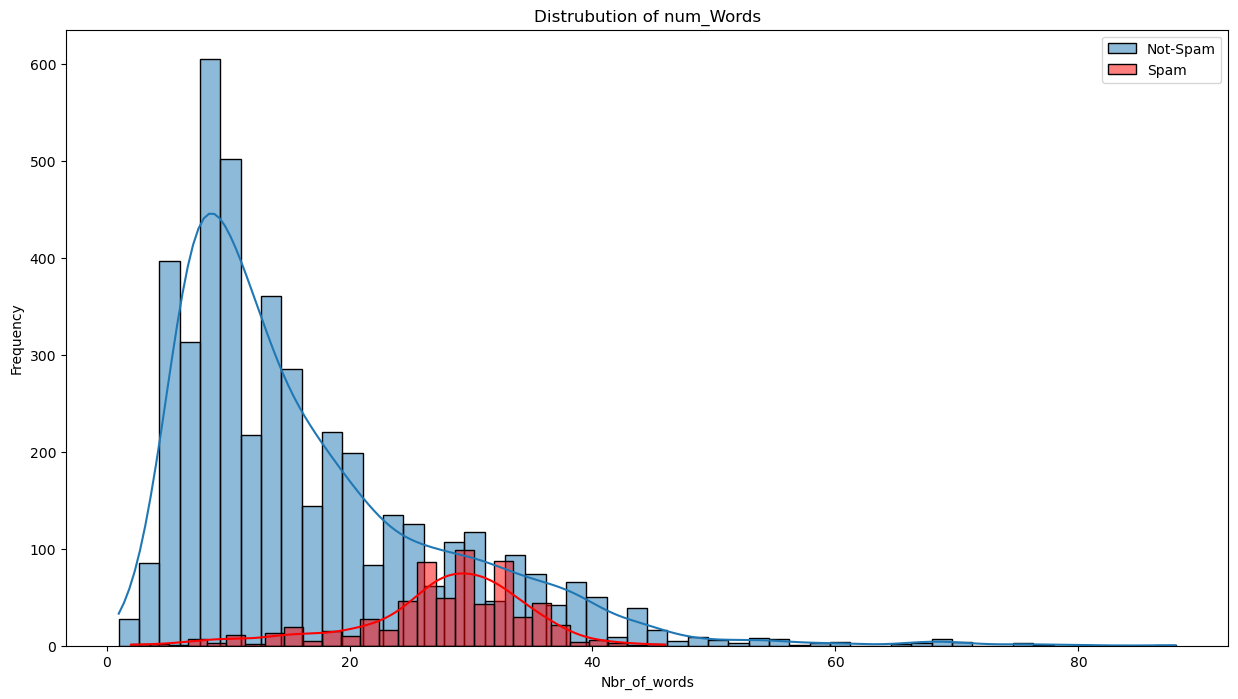

In [146]:
plt.figure(figsize=(15,8))
plt.title("Distrubution of num_Words")

sns.histplot(not_spam['num_of_words'],label='Not-Spam',kde=True)
sns.histplot(spam['num_of_words'],label='Spam',color='red',kde=True)

plt.xlabel("Nbr_of_words")
plt.ylabel("Frequency")

plt.legend()
plt.show()

# Conclussion
1. we can see that after removing the outlier our data look good

# Num_words

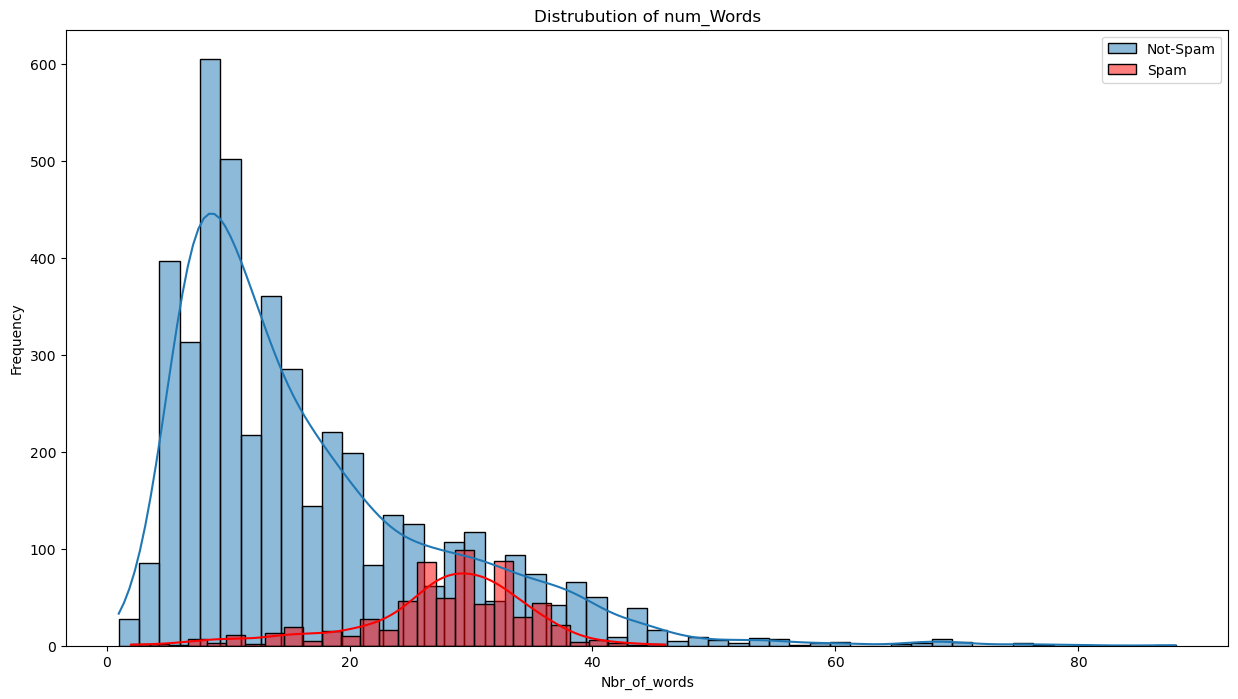

In [147]:
plt.figure(figsize=(15,8))
plt.title("Distrubution of num_Words")

sns.histplot(not_spam['num_of_words'],label='Not-Spam',kde=True)
sns.histplot(spam['num_of_words'],label='Spam',color='red',kde=True)

plt.xlabel("Nbr_of_words")
plt.ylabel("Frequency")

plt.legend()
plt.show()

# Num_sentence

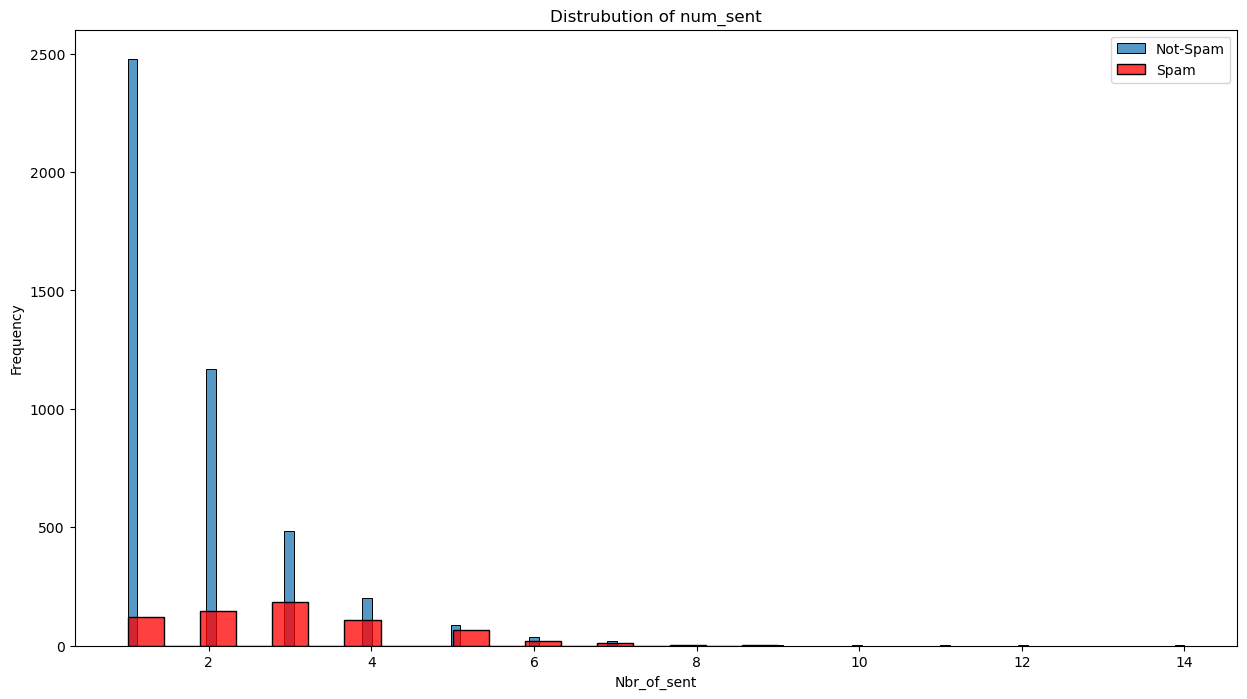

In [148]:
plt.figure(figsize=(15,8))
plt.title("Distrubution of num_sent")

sns.histplot(not_spam['nbr_sent'],label='Not-Spam')
sns.histplot(spam['nbr_sent'],label='Spam',color='red')

plt.xlabel("Nbr_of_sent")
plt.ylabel("Frequency")

plt.legend()
plt.show()

# Correlation

In [149]:
corr=email.select_dtypes('number').corr()
corr

,target,num_char,num_of_words,nbr_sent
target,1.000000,0.459295,0.329697,0.308402
num_char,0.459295,1.000000,0.961380,0.601013
num_of_words,0.329697,0.961380,1.000000,0.640211
nbr_sent,0.308402,0.601013,0.640211,1.000000


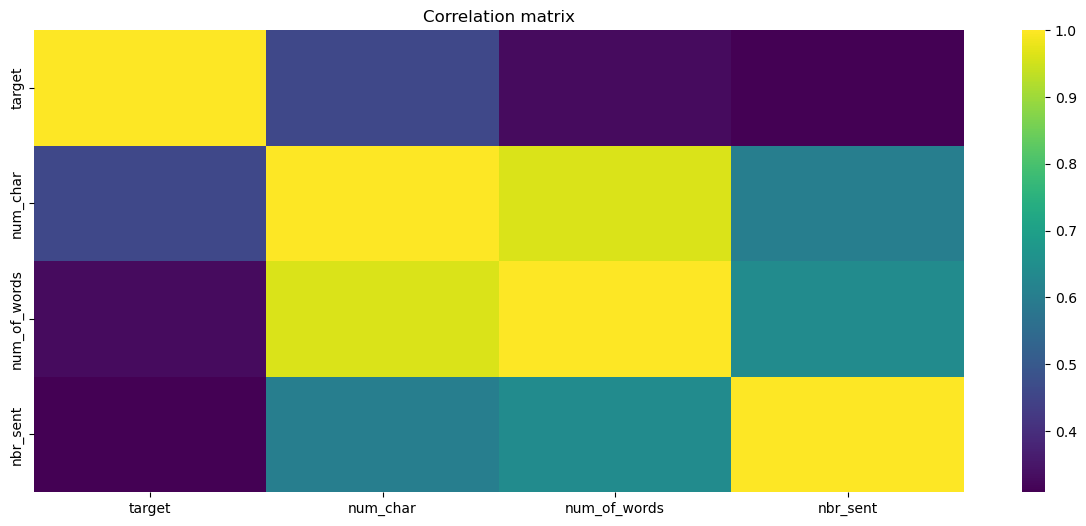

In [150]:
plt.figure(figsize=(15,6))
plt.title("Correlation matrix")
sns.heatmap(corr,cmap='viridis')
plt.show()

# Conclussion

# Pairplot

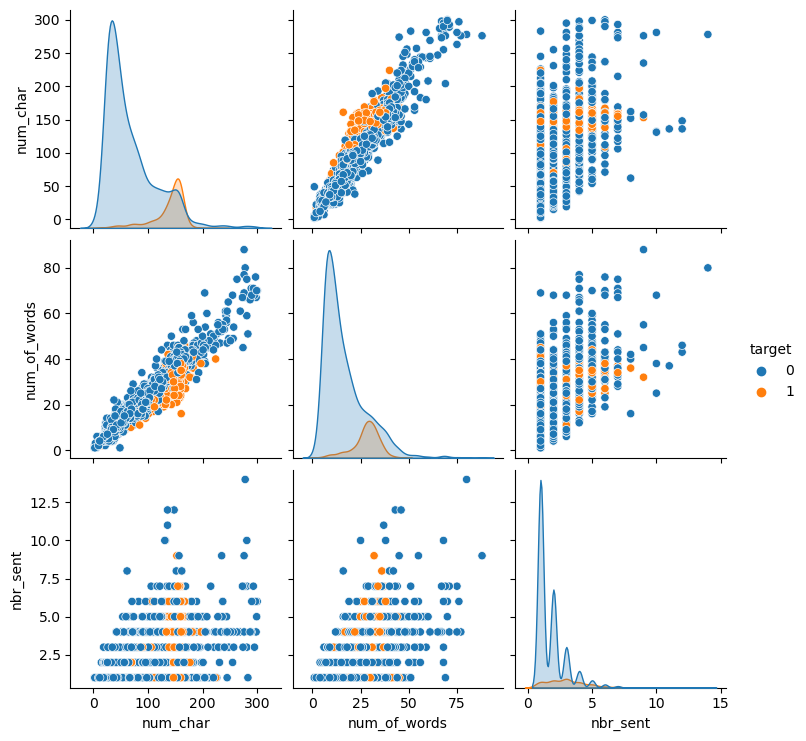

In [151]:
sns.pairplot(email.select_dtypes('number'),hue='target')
plt.show()

# Text Preprocessing
1. LowerCase
2. Remove Special Character
3. Tokenize the Word
4. Steming

In [152]:
import string
from nltk.stem import PorterStemmer
def text_transformation(text):
    # Lower Case
    text=text.lower()
    
    # Removing Special Char
    new_text=""
    for char in text:
        if(char not in string.punctuation):
            new_text+=char
            
    # Tokenize 
    new_text=nltk.word_tokenize(new_text)
    
    # Stem the text
    temp=[]
    for text in new_text:
        text=PorterStemmer().stem(text)
        temp.append(text)

    """After completing All the Step join the list b/c we can apply these transformation text should be converted in list"""
    return " ".join(temp)

# Test the Function

In [153]:
text_transformation("!!!!!SAMI IS A BOY Dancing Loving @!&!^**#(&#(!!!!!")

'sami is a boy danc love'

In [154]:
text_transformation(email['text'][0])

'go until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat'

In [155]:
email['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

# Apply the Fun

In [156]:
email['trans_text']=email['text'].apply(text_transformation)

In [157]:
email.head(2)

,target,text,num_char,num_of_words,nbr_sent,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


# Now we have both original and transform text so now going forward we can used only two columns `target` and `transform text`

In [158]:
email_df=email.copy()

In [159]:
email=email[['target','trans_text']]
email.head(2)

,target,trans_text
0,0,go until jurong point crazi avail onli in bugi...
1,0,ok lar joke wif u oni


# Plot a Word Cloud
### Now Check most frequent words used in `spam` and `Not Spam` messages

In [160]:
# !pip install wordcloud

In [161]:
from wordcloud import WordCloud

In [162]:
not_spam=email[email['target']==0]['trans_text'].str.cat(sep=' ')
not_spam

'go until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat ok lar joke wif u oni u dun say so earli hor u c alreadi then say nah i dont think he goe to usf he live around here though even my brother is not like to speak with me they treat me like aid patent as per your request mell mell oru minnaminungint nurungu vettam ha been set as your callertun for all caller press 9 to copi your friend callertun im gon na be home soon and i dont want to talk about thi stuff anymor tonight k ive cri enough today ive been search for the right word to thank you for thi breather i promis i wont take your help for grant and will fulfil my promis you have been wonder and a bless at all time i have a date on sunday with will oh kim watch here eh u rememb how 2 spell hi name ye i did he v naughti make until i v wet fine if thatåõ the way u feel thatåõ the way it gota b is that serious how you spell hi name i\x89û÷m go to tri for 2 month ha ha onli joke so ì pay firs

In [163]:
spam=email[email['target']==1]['trans_text'].str.cat(sep=' ')
spam

'free entri in 2 a wkli comp to win fa cup final tkt 21st may 2005 text fa to 87121 to receiv entri questionstd txt ratetc appli 08452810075over18 freemsg hey there darl it been 3 week now and no word back id like some fun you up for it still tb ok xxx std chg to send å£150 to rcv winner as a valu network custom you have been select to receivea å£900 prize reward to claim call 09061701461 claim code kl341 valid 12 hour onli had your mobil 11 month or more u r entitl to updat to the latest colour mobil with camera for free call the mobil updat co free on 08002986030 six chanc to win cash from 100 to 20000 pound txt csh11 and send to 87575 cost 150pday 6day 16 tsandc appli repli hl 4 info urgent you have won a 1 week free membership in our å£100000 prize jackpot txt the word claim to no 81010 tc wwwdbuknet lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub to use your credit click the wap link in the next txt messag or click here httpwap xxxmobilemovieclubcomnqjkgighjjgcbl england v macedon

# Word Cloud For Spam SMS
1. The Word Cloud Shoud the most frequent word that are used in spam messages

In [164]:
cloud=WordCloud(width=500,height=500,
                background_color='black',
                stopwords=None,min_font_size=2)
cloud.generate(spam)

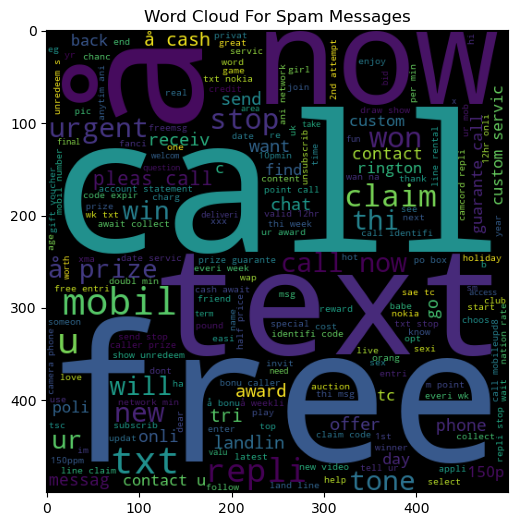

In [165]:
plt.figure(figsize=(20,6))
plt.title("Word Cloud For Spam Messages")
plt.imshow(cloud)
plt.show()

# Word Cloud For Not Spam SMS
1. The Word Cloud Shoud the most frequent word that are used in spam messages

In [166]:
cloud=WordCloud(width=500,height=500,
                background_color='white',
                stopwords=None,min_font_size=2)
cloud.generate(not_spam)

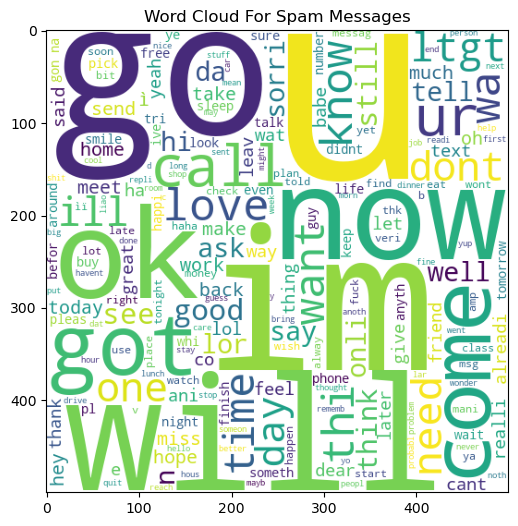

In [167]:
plt.figure(figsize=(20,6))
plt.title("Word Cloud For Spam Messages")
plt.imshow(cloud)
plt.show()

# Now see the All `spam` Words

In [168]:
spam_words=[]
for message in email[email['target']==1]['trans_text'].to_list():
    for word in message.split():
#         print(word)
        spam_words.append(word)

# Similarly for All `Not spam` Words

In [169]:
not_spam_words=[]
for message in email[email['target']==0]['trans_text'].to_list():
    for word in message.split():
#         print(word)
        not_spam_words.append(word)

In [170]:
not_spam_words

['go',
 'until',
 'jurong',
 'point',
 'crazi',
 'avail',
 'onli',
 'in',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'so',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'then',
 'say',
 'nah',
 'i',
 'dont',
 'think',
 'he',
 'goe',
 'to',
 'usf',
 'he',
 'live',
 'around',
 'here',
 'though',
 'even',
 'my',
 'brother',
 'is',
 'not',
 'like',
 'to',
 'speak',
 'with',
 'me',
 'they',
 'treat',
 'me',
 'like',
 'aid',
 'patent',
 'as',
 'per',
 'your',
 'request',
 'mell',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'ha',
 'been',
 'set',
 'as',
 'your',
 'callertun',
 'for',
 'all',
 'caller',
 'press',
 '9',
 'to',
 'copi',
 'your',
 'friend',
 'callertun',
 'im',
 'gon',
 'na',
 'be',
 'home',
 'soon',
 'and',
 'i',
 'dont',
 'want',
 'to',
 'talk',
 'about',
 'thi',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'ive',
 'cri',
 'enough',
 'today',


# Now see the count of each words using `Counter`

In [171]:
from collections import Counter

In [172]:
spam_counts=Counter(spam_words)
spam_df=pd.DataFrame(spam_counts.most_common(30))
spam_df.head(1)

,0,1
0,to,594


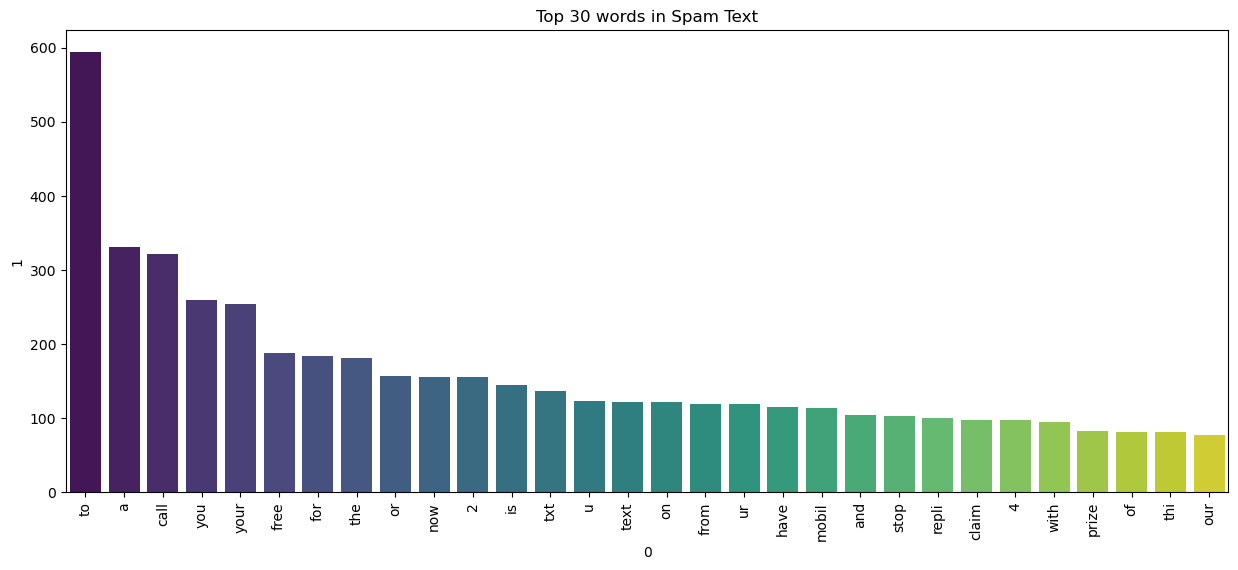

In [173]:
plt.figure(figsize=(15,6))
plt.title("Top 30 words in Spam Text")
sns.barplot(x=spam_df[0],y=spam_df[1],palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

In [174]:
not_spam_counts=Counter(not_spam_words)
not_spam_df=pd.DataFrame(not_spam_counts.most_common(30))
not_spam_df.head(6)

,0,1
0,i,1999
1,you,1700
2,to,1397
3,the,984
4,a,919
5,u,866


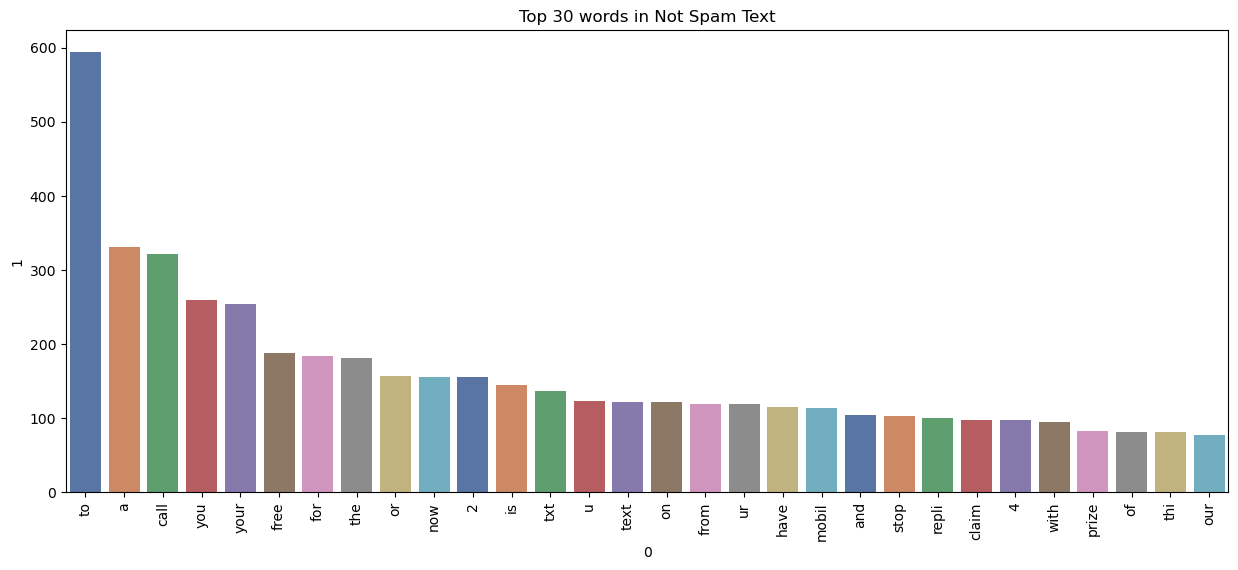

In [175]:
plt.figure(figsize=(15,6))
plt.title("Top 30 words in Not Spam Text")
sns.barplot(x=spam_df[0],y=spam_df[1],palette='deep')
plt.xticks(rotation='vertical')
plt.show()

# Time For Model Building

In [176]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Saperate the `feature` and `label`

In [177]:
feature=email['trans_text']
label=email['target']

In [178]:
feature.head(2)

0    go until jurong point crazi avail onli in bugi...
1                                ok lar joke wif u oni
Name: trans_text, dtype: object

In [179]:
label.head(2)

0    0
1    0
Name: target, dtype: int32

# split the data
1. `Test data` for testing purpose
2. `Train data` for training purpose

In [180]:
x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=0.2,random_state=45)

In [181]:
x_train.shape

(4111,)

In [182]:
x_test.shape

(1028,)

# Building a Pipeline

In [183]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,mean_squared_error

In [199]:
models={
    "multi_nomial":MultinomialNB(),
    'Bernali':BernoulliNB(),
    'LinearReg':LogisticRegression( penalty='l2',class_weight='balanced'),
    'K_Neriges':KNeighborsClassifier(n_neighbors=10),
    'Adda_boost':AdaBoostClassifier(),
    'extra_tree':ExtraTreesClassifier(),
    'RandomForest':RandomForestClassifier(),
    'decession':DecisionTreeClassifier(),
    'machine':SVC()
}

In [201]:
results = {
    'model': [],
    'accuracy': [],
    'precision': [],
    'Error': [],
    'confusion_matrix': [],
    "train_score": [],
    "test_score": []
}

for model_name, model in models.items():
    print(model)
    
    pipe = Pipeline(steps=[
        ('vectorize', TfidfVectorizer(stop_words='english', max_features=3000)),
        ('model', model)
    ])
    
    pipe.fit(x_train, y_train)
    
    pre = pipe.predict(x_test)
    
    acc = accuracy_score(y_test, pre)
    prec = precision_score(y_test, pre)
    err = mean_squared_error(y_test, pre)
    mat = confusion_matrix(y_test, pre)
    
    # Apply cross-validation on both train and test set
    train_model = cross_val_score(pipe, x_train, y_train, cv=5, scoring='accuracy').mean()
    test_model = cross_val_score(pipe, x_test, y_test, cv=5, scoring='accuracy').mean()
    
    results['model'].append(model_name)
    results['accuracy'].append(acc)
    results['precision'].append(prec)
    results['Error'].append(err)
    results['confusion_matrix'].append(mat)
    results['train_score'].append(train_model)
    results['test_score'].append(test_model)
    
    print(f"{model_name}\n {pre}\n Accuracy {acc} \n Precision {prec} \n Error {err} \n matrix \n{mat}")
    print("*" * 50)
    print("\n")


MultinomialNB()
multi_nomial
 [0 0 0 ... 0 0 0]
 Accuracy 0.9678988326848249 
 Precision 0.9821428571428571 
 Error 0.032101167315175094 
 matrix 
[[885   2]
 [ 31 110]]
**************************************************


BernoulliNB()
Bernali
 [0 0 0 ... 0 0 0]
 Accuracy 0.9737354085603113 
 Precision 0.9913793103448276 
 Error 0.026264591439688716 
 matrix 
[[886   1]
 [ 26 115]]
**************************************************


LogisticRegression(class_weight='balanced')
LinearReg
 [1 0 0 ... 0 0 0]
 Accuracy 0.9747081712062257 
 Precision 0.9197080291970803 
 Error 0.02529182879377432 
 matrix 
[[876  11]
 [ 15 126]]
**************************************************


KNeighborsClassifier(n_neighbors=10)
K_Neriges
 [0 0 0 ... 0 0 0]
 Accuracy 0.877431906614786 
 Precision 1.0 
 Error 0.122568093385214 
 matrix 
[[887   0]
 [126  15]]
**************************************************


AdaBoostClassifier()
Adda_boost
 [0 0 0 ... 0 0 0]
 Accuracy 0.9601167315175098 
 Precision 

In [186]:
df=pd.DataFrame(results)
df.sort_values(by=['precision','accuracy'],ascending=[False,True],inplace=True)
df

,model,accuracy,precision,Error,confusion_matrix,train_score,test_score
3,K_Neriges,0.877432,1.000000,0.122568,"[[887, 0], [126, 15]]",0.886159,0.906588
1,Bernali,0.973735,0.991379,0.026265,"[[886, 1], [26, 115]]",0.974217,0.908539
8,machine,0.967899,0.990909,0.032101,"[[886, 1], [32, 109]]",0.973486,0.925086
2,LinearReg,0.949416,0.989011,0.050584,"[[886, 1], [51, 90]]",0.958405,0.900767
0,multi_nomial,0.967899,0.982143,0.032101,"[[885, 2], [31, 110]]",0.965216,0.906588
6,RandomForest,0.967899,0.973684,0.032101,"[[884, 3], [30, 111]]",0.973973,0.931887
5,extra_tree,0.969844,0.950820,0.030156,"[[881, 6], [25, 116]]",0.976649,0.941629
4,Adda_boost,0.960117,0.931034,0.039883,"[[879, 8], [33, 108]]",0.966433,0.931892
7,decession,0.941634,0.824000,0.058366,"[[865, 22], [38, 103]]",0.957432,0.931906


**We can see that Over all `Bernali Naive Base` give the best result for over all both `accuracy`, `precession` and `error`**

# Now we will use bernalli naive base

In [202]:
pipe=Pipeline(steps=[
    ('vectorize',TfidfVectorizer(stop_words='english',max_features=3000)),
    ('model',LogisticRegression( penalty='l2',class_weight='balanced'))
])

In [203]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('vectorize',
                 TfidfVectorizer(max_features=3000, stop_words='english')),
                ('model', LogisticRegression(class_weight='balanced'))])

In [204]:
pre=pipe.predict(x_test)

In [205]:
acc=accuracy_score(y_test,pre)
mat=confusion_matrix(y_test,pre)
prec=precision_score(y_test,pre)
error=mean_squared_error(y_test,pre)

In [206]:
print("Accuracy is: ",acc)
print("Precesssion Score is: ",prec)
print("Error is: ",error)
print("Confussion MAtrix is: ")
print(mat)

Accuracy is:  0.9747081712062257
Precesssion Score is:  0.9197080291970803
Error is:  0.02529182879377432
Confussion MAtrix is: 
[[876  11]
 [ 15 126]]


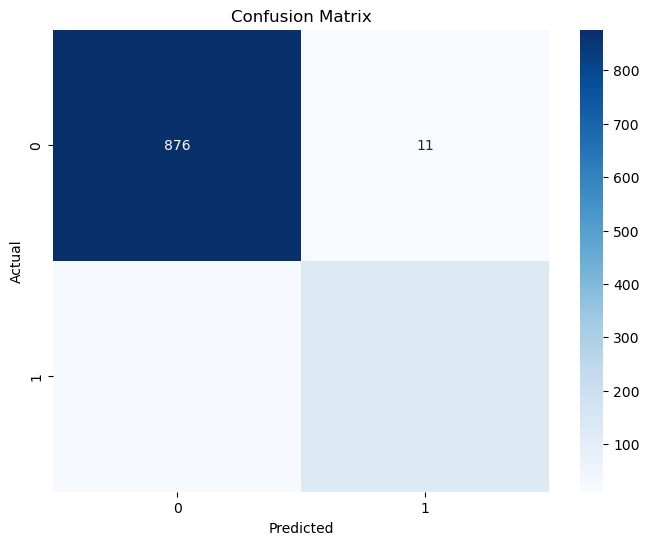

In [207]:
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

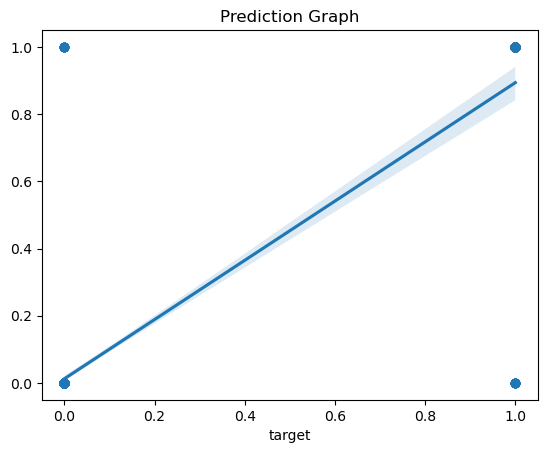

In [208]:
plt.title("Prediction Graph")
sns.regplot(x=y_test,y=pre)
plt.show()

# Cross Validation

In [209]:
train_model=cross_val_score(pipe,x_train,y_train,cv=5,scoring='accuracy')
test_model=cross_val_score(pipe,x_test,y_test,cv=5,scoring='accuracy')

In [210]:
print("Train Model performance: ",train_model.mean())
print("Test Model performance: ",test_model.mean())

Train Model performance:  0.9759197996765734
Test Model performance:  0.9562206961875444


# Testing the Model

In [280]:
spam_messages = np.array([
    "Congratulations! You've won a luxury vacation package to an exotic destination of your choice. Experience the trip of a lifetime and create unforgettable memories. Claim your prize now by clicking the link below!",
    "You're our lucky winner! As a token of our appreciation, we're delighted to offer you exclusive access to our premium rewards program. Enjoy buy one, get one free deals, special discounts, and VIP treatment. Don't miss out on this limited-time offer!",
    "Hurry, don't miss out on our incredible limited-time offer! Buy one item and get the second one free. Whether you're shopping for yourself or looking for the perfect gift, now's the time to take advantage of this amazing deal. Shop now!",
    "Are you ready to change your life and achieve financial freedom? Our revolutionary investment opportunity offers you the chance to get rich quick with minimal effort. Join our program today and start making money effortlessly!",
    "URGENT: Your account requires immediate attention! Our records indicate that your account is at risk or has been compromised. To secure your account and prevent unauthorized access, please click the link below to resolve the issue immediately.",
    "Congratulations, you're the lucky winner of a free vacation package to your dream destination! Escape the hustle and bustle of everyday life and relax in paradise. Act now to claim your prize and start planning your getaway!",
    "Don't miss out on our special discount exclusively for our valued customers like you! Take advantage of this opportunity to save big on your favorite products and services. Shop now and enjoy incredible savings!",
    "Earn money from the comfort of your own home with our easy work-from-home program. Whether you're looking to supplement your income or start a new career, our program offers flexible hours, competitive pay, and endless opportunities for growth. Join us today and start earning!",
    "We have an exclusive deal just for you! Act fast before it's gone. Whether you're looking for a last-minute getaway, a new wardrobe, or the latest gadgets, we've got you covered. Don't wait, seize this opportunity now!",
    "Unlock secret savings and receive exclusive offers by signing up for our newsletter. Be the first to know about our latest promotions, product launches, and special events. Join our community today and start saving!"
])


# Convert the list of messages to a numpy array
spam_messages_array = np.array(spam_messages)
spam_messages_array

array(["Congratulations! You've won a luxury vacation package to an exotic destination of your choice. Experience the trip of a lifetime and create unforgettable memories. Claim your prize now by clicking the link below!",
       "You're our lucky winner! As a token of our appreciation, we're delighted to offer you exclusive access to our premium rewards program. Enjoy buy one, get one free deals, special discounts, and VIP treatment. Don't miss out on this limited-time offer!",
       "Hurry, don't miss out on our incredible limited-time offer! Buy one item and get the second one free. Whether you're shopping for yourself or looking for the perfect gift, now's the time to take advantage of this amazing deal. Shop now!",
       'Are you ready to change your life and achieve financial freedom? Our revolutionary investment opportunity offers you the chance to get rich quick with minimal effort. Join our program today and start making money effortlessly!',
       'URGENT: Your account req

In [281]:
pipe.predict(spam_messages_array)

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [224]:
ham_samples = np.array([
    "Hello, how are you doing today?",
    "Reminder: Your appointment is scheduled for tomorrow at 2 PM.",
    "The weather forecast for this weekend is sunny and warm.",
    "I'll be working late tonight. Let's catch up tomorrow.",
    "Don't forget to pick up groceries on your way home.",
    "The project deadline has been extended by one week.",
    "Thanks for your email. I'll get back to you as soon as possible.",
    "I'm looking forward to seeing you at the party on Saturday.",
    "Here's the report you requested. Let me know if you need any further information.",
    "Congratulations on your recent promotion. Well-deserved!"
])

In [226]:
pipe.predict(ham_samples)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [239]:
spam_samples = np.array([
    "Act now and receive a 50% discount on all purchases!",
    "Make easy money from home with our proven system.",
    "You've won a brand new car! Claim your prize now.",
    "Limited-time offer: Get a free trial of our premium service.",
    "Click here to unlock exclusive deals and discounts.",
    "Congratulations! You've been selected for a special promotion.",
    "Don't miss out on this once-in-a-lifetime opportunity.",
    "Need cash fast? Apply for our instant payday loan.",
    "Get rich quick with our revolutionary investment strategy.",
    "You've been pre-approved for a credit card with a $10,000 limit."
])

In [288]:
pipe.predict(spam_samples)

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

# Pickle the model

In [289]:
import pickle as pkl

In [290]:
with open("spam_cls.pkl","wb")as f:
    pkl.dump(pipe,f)